In [30]:
import requests
import json
import pandas as pd

result = requests.get("http://localhost:3000/api/dx/23_middle_student")

rows = json.loads(result.text)["rows"]
df = pd.DataFrame(rows)
df = df.drop(df.columns[0:7], axis=1)
df = df.drop(['Address', 'Address2', 'StudentStatus', 'cs_count', 'max_sche_date'], axis=1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

df.shape

(2497, 7)

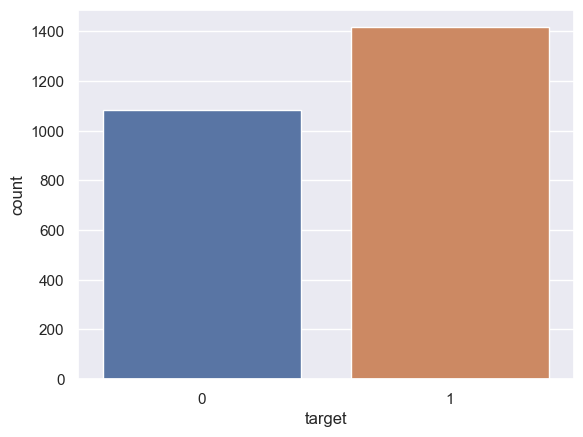

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

sns.countplot(x="target", data=df)
plt.show()

In [41]:
# 데이터 전처리
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)
X

array([[0.        , 0.046875  , 0.        , 0.        , 0.01851852,
        0.10353535],
       [0.        , 0.296875  , 0.        , 0.        , 0.        ,
        0.13131313],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.05263158, 0.140625  , 0.        , 0.        , 0.        ,
        0.05808081],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.1875    , 0.        , 0.        , 0.24074074,
        0.16414141]])

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)

(1997, 6)
(500, 6)


In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [56]:
model = keras.models.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu', input_shape=(6,) ),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\wogus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 100)                 │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           1,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,333 (9.11 KB)

 Trainable params: 2,333 (9.11 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
model.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.5869 - loss: 0.6758
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.7003 - loss: 0.6069
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.7298 - loss: 0.5565
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7322 - loss: 0.5505
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7187 - loss: 0.5618
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.7409 - loss: 0.5443
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.7523 - loss: 0.5241
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.7467 - loss: 0.5297
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7390 - loss: 0.5360
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7526 - loss: 0.5232
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.7491 - loss: 0.5226
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━

In [60]:
model.evaluate(x_test, y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7685 - loss: 0.4738  


[0.5333090424537659, 0.734000027179718]

In [61]:
y_pred = model.predict(x_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [64]:
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[126,  90],
       [ 43, 241]], dtype=int64)